### **Import Libraries:**

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

### **Set Pandas Display Options:**

In [3]:
pd.set_option('display.max_columns', None)

### Connect to SQLite Database:

In [4]:
conn = sqlite3.connect(r"C:\Users\yashu\OneDrive\Desktop\Github_Projects\Credit_Card_Fraud_Detection\corecard_credit_card_transactions.db")

### Load Data from Database:

In [5]:
df = pd.read_sql("SELECT * FROM transactions", conn)

### Database Visualization and Info:

In [6]:
df

,Environment,TranId,TranTime,PostTime,TranType,TxnAcctId,StateStatus,priority,PrimaryCurrencyCode,NetworkName,UniqueID,MessageTypeIdentifier,PAN_Hash,ProcCode,ProcCodeFromAccType,ProcCodeToAccType,TransactionAmount,TransmissionDateTime,SystemTraceAuditNumber,TimeLocalTransaction,DateLocalTransaction,MerchantType,RetrievalReferenceNumber,IResponseCode,ResponseCode,ApprovalCode,CardAcceptorTerminalID,CardAcceptorIdCode,AuthorizationResponseCode,EffectiveDate_ForAgeOff,TransactionLifeCycleUniqueID,AuthStatus,AcquiringInsitutionIDCode,ForwardingInsitutionIDCode,POSTransactionStatusInd,TxnCategory,TxnCode_Internal,PurgeDate,ResponseTranType,ResponseMTI,AdvReasonCode,AVResponse,PostingRef,PhysicalSource,TerminalType,TxnSource,Field112,CalcOTB,AuthVarianceException,MsgIndicator,TxnSubCategory,AccountNumber,CardNumber4Digits,CashBackAmount,OutstandingAmount,BankNetReferenceNumber,Skey,PinExist,EmbAndBsegAcctStatus,CurrentBalance,CardAcceptorNameLocation,AgingParameter,CompletionAmount,CrossBorderTxnIndicator,MerchantName,NetworkReferenceID,TraceId,CurrentBalanceCO,TotalOutStgAuthAmt,CurrentBalance_After,TotalOutStgAuthAmt_After,MulCountSeqNo,ActualReversalAmount,AuthUniqueId,MatchedCriteria,ATC,FraudIndicator,StateCode,WeekOfMonth,MerchantGroup
0,CRD,24278398,2021-02-01 13:12:11,2021-02-01 13:12:11,93,1236848,None,0,lclUnitedStates,PL,931567799,100,1.300351e+08,0,0,0,1340.00,2021-02-01 13:12:11,NaN,2021-02-01 13:12:11,2021-02-01 00:00:00,NaN,None,0,0,914159,None,None,None,None,24278398,2,NaN,NaN,None,101,27010.0,2021-02-06 00:00:00,94.0,110.0,None,None,Approved,PP,None,60,None,7250.00,None,2,None,8.000000e+15,1928.0,0,0.0,None,2199.0,0.0,2.2.2.2.1,0.00,None,LOGO,0.00,None,None,None,None,0,0.00,0.00,0.00,NaN,0.0,NaN,None,NaN,NaN,,1,Personal Service Providers
1,CRD,24278399,2021-02-01 13:56:52,2021-02-01 13:56:52,93,1246419,None,0,lclUnitedStates,PL,931567800,100,1.225000e+09,0,0,0,4500.00,2021-02-01 13:56:52,NaN,2021-02-01 13:56:52,2021-02-01 00:00:00,NaN,None,0,0,344153,None,None,None,None,24278399,2,NaN,NaN,None,101,27010.0,2021-02-06 00:00:00,94.0,110.0,None,None,Approved,PP,None,60,None,4500.00,None,2,None,8.000000e+15,2595.0,0,0.0,None,2199.0,0.0,2.2.2.2.1,0.00,None,LOGO,0.00,None,None,None,None,0,0.00,0.00,0.00,NaN,0.0,NaN,None,NaN,NaN,,1,Personal Service Providers
2,CRD,24278400,2021-02-01 14:18:35,2021-02-01 14:18:35,93,682592,None,0,lclUnitedStates,PL,931567802,100,1.460517e+08,0,0,0,370.00,2021-02-01 14:18:35,NaN,2021-02-01 14:18:35,2021-02-01 00:00:00,NaN,None,0,0,475491,None,None,None,None,24278400,2,NaN,NaN,None,101,27010.0,2021-02-06 00:00:00,94.0,110.0,None,None,Approved,PP,None,60,None,1000.00,None,2,None,8.000000e+15,9463.0,0,0.0,None,2199.0,0.0,2.2.2.2.1,0.00,None,LOGO,0.00,None,None,None,None,0,0.00,0.00,0.00,NaN,0.0,NaN,None,NaN,NaN,,1,Personal Service Providers
3,CRD,24278401,2021-02-01 15:00:39,2021-02-01 15:00:39,93,1246436,None,0,lclUnitedStates,PL,931603409,100,-5.797537e+07,0,0,0,15000.00,2021-02-01 15:00:39,NaN,2021-02-01 15:00:39,2021-02-01 00:00:00,NaN,None,0,0,233021,None,None,None,None,24278401,2,NaN,NaN,None,101,27010.0,2021-02-06 00:00:00,94.0,110.0,None,None,Approved,PP,None,60,None,15000.00,None,2,None,8.000000e+15,2603.0,0,0.0,None,2199.0,0.0,2.2.2.2.1,0.00,None,LOGO,0.00,None,None,None,None,0,0.00,0.00,0.00,NaN,0.0,NaN,None,NaN,NaN,,1,Personal Service Providers
4,CRD,24278402,2021-02-01 18:24:31,2021-02-01 18:24:31,93,731310,None,0,lclUnitedStates,PL,931567806,100,-1.380244e+09,0,0,0,454.90,2021-02-01 18:24:31,NaN,2021-02-01 18:24:31,2021-02-01 00:00:00,NaN,None,0,0,455317,None,None,None,None,24278402,2,NaN,NaN,None,101,27010.0,2021-02-06 00:00:00,94.0,110.0,None,None,Approved,PP,None,60,None,1000.00,None,2,None,8.000000e+15,1910.0,0,0.0,None,2199.0,0.0,2.2.2.2.1,0.00,None,LOGO,0.00,None,None,None,None,0,0.00,0.00,0.00,NaN,0.0,NaN,None,NaN,NaN,,1,Personal Service Providers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [7]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")
    print(f"Number of unique values in {column}: {df[column].nunique()}")

Unique values in Environment: ['CRD']
Number of unique values in Environment: 1
Unique values in TranId: [24278398 24278399 24278400 ... 24347864 24347868 24347869]
Number of unique values in TranId: 535907
Unique values in TranTime: ['2021-02-01 13:12:11' '2021-02-01 13:56:52' '2021-02-01 14:18:35' ...
 '2021-01-31 23:59:37' '2021-01-31 23:59:42' '2021-01-31 23:59:53']
Number of unique values in TranTime: 461346
Unique values in PostTime: ['2021-02-01 13:12:11' '2021-02-01 13:56:52' '2021-02-01 14:18:35' ...
 '2021-01-31 23:59:37' '2021-01-31 23:59:42' '2021-01-31 23:59:53']
Number of unique values in PostTime: 461346
Unique values in TranType: ['93' '94' '95' '91']
Number of unique values in TranType: 4
Unique values in TxnAcctId: [1236848 1246419  682592 ...  674185  658008  632541]
Number of unique values in TxnAcctId: 48872
Unique values in StateStatus: [None '0.0' '50.0' ... '196.59' '1858.1' '143.79']
Number of unique values in StateStatus: 28465
Unique values in priority: [0]
N

In [8]:
df.isnull().sum()

Environment            0
TranId                 0
TranTime               0
PostTime               0
TranType               0
                   ...  
ATC               366114
FraudIndicator    535470
StateCode              0
WeekOfMonth            0
MerchantGroup          0
Length: 80, dtype: int64

In [9]:
# Identify columns with all null values
all_null_columns = df.columns[df.isnull().all()]
print(f"Columns with all values null: {all_null_columns}")
print(f"Number of columns with all values null: {len(all_null_columns)}")

Columns with all values null: Index(['NetworkReferenceID'], dtype='object')
Number of columns with all values null: 1


In [10]:
df.columns.unique()

Index(['Environment', 'TranId', 'TranTime', 'PostTime', 'TranType',
       'TxnAcctId', 'StateStatus', 'priority', 'PrimaryCurrencyCode',
       'NetworkName', 'UniqueID', 'MessageTypeIdentifier', 'PAN_Hash',
       'ProcCode', 'ProcCodeFromAccType', 'ProcCodeToAccType',
       'TransactionAmount', 'TransmissionDateTime', 'SystemTraceAuditNumber',
       'TimeLocalTransaction', 'DateLocalTransaction', 'MerchantType',
       'RetrievalReferenceNumber', 'IResponseCode', 'ResponseCode',
       'ApprovalCode', 'CardAcceptorTerminalID', 'CardAcceptorIdCode',
       'AuthorizationResponseCode', 'EffectiveDate_ForAgeOff',
       'TransactionLifeCycleUniqueID', 'AuthStatus',
       'AcquiringInsitutionIDCode', 'ForwardingInsitutionIDCode',
       'POSTransactionStatusInd', 'TxnCategory', 'TxnCode_Internal',
       'PurgeDate', 'ResponseTranType', 'ResponseMTI', 'AdvReasonCode',
       'AVResponse', 'PostingRef', 'PhysicalSource', 'TerminalType',
       'TxnSource', 'Field112', 'CalcOTB', 'Auth

In [11]:
df.shape

(535908, 80)

### Fraud Only Database and Info:

In [12]:
# Handle missing values in the 'FraudIndicator' column
df['FraudIndicator'] = df['FraudIndicator'].fillna(0)

fraud = pd.read_sql("SELECT * FROM transactions WHERE FraudIndicator = 1", conn)                                  
fraud

,Environment,TranId,TranTime,PostTime,TranType,TxnAcctId,StateStatus,priority,PrimaryCurrencyCode,NetworkName,UniqueID,MessageTypeIdentifier,PAN_Hash,ProcCode,ProcCodeFromAccType,ProcCodeToAccType,TransactionAmount,TransmissionDateTime,SystemTraceAuditNumber,TimeLocalTransaction,DateLocalTransaction,MerchantType,RetrievalReferenceNumber,IResponseCode,ResponseCode,ApprovalCode,CardAcceptorTerminalID,CardAcceptorIdCode,AuthorizationResponseCode,EffectiveDate_ForAgeOff,TransactionLifeCycleUniqueID,AuthStatus,AcquiringInsitutionIDCode,ForwardingInsitutionIDCode,POSTransactionStatusInd,TxnCategory,TxnCode_Internal,PurgeDate,ResponseTranType,ResponseMTI,AdvReasonCode,AVResponse,PostingRef,PhysicalSource,TerminalType,TxnSource,Field112,CalcOTB,AuthVarianceException,MsgIndicator,TxnSubCategory,AccountNumber,CardNumber4Digits,CashBackAmount,OutstandingAmount,BankNetReferenceNumber,Skey,PinExist,EmbAndBsegAcctStatus,CurrentBalance,CardAcceptorNameLocation,AgingParameter,CompletionAmount,CrossBorderTxnIndicator,MerchantName,NetworkReferenceID,TraceId,CurrentBalanceCO,TotalOutStgAuthAmt,CurrentBalance_After,TotalOutStgAuthAmt_After,MulCountSeqNo,ActualReversalAmount,AuthUniqueId,MatchedCriteria,ATC,FraudIndicator,StateCode,WeekOfMonth,MerchantGroup
0,CRD,24349221,2021-02-01 02:56:13,2021-02-01 02:56:13,95,1231275,29.95,0,lclUnitedStates,MC,24349221,120,-565347239,0,0,0,29.95,2021-02-01 07:32:32,396405,2021-02-01 02:32:32,2021-02-01 00:00:00,5968,103239396405,0,0,88891B,00063930,063930000015694,88891B,2021-02-06 02:56:13,24349221,2,3286,3286.0,0.0,101,13257,2021-02-11 00:00:00,98,130,113.0,None,Approved,MC,None,16,1.0,1457.86,1,2,None,9000000500331393,5694,0,0,UD6X58,2136,0,10.2.2.2.1,42.14,OTL*SCORESENSE.COM 800-679-6327 TX,LOGO,29.95,N,OTL*SCORESENSE.COM,None,MPLUD6X580201,0,0.00,42.14,29.95,None,0,16718282,None,NaN,1,TX,1,Personal Service Providers
1,CRD,24355905,2021-02-01 13:31:57,2021-02-01 13:31:57,95,1217331,52.36,0,lclUnitedStates,MC,24355905,100,-80052340,0,0,0,52.36,2021-02-01 18:31:57,815669,2021-01-31 18:06:23,2021-01-31 00:00:00,7512,103261815669,0,0,43879B,42041005,4445046642041,None,2021-02-06 13:31:57,24355905,2,17727,NaN,0.0,101,13257,2021-02-11 00:00:00,98,110,None,None,Approved,MC,None,16,None,3480.01,None,2,None,9000000500075270,3191,0,0,E537HL,403,0,2.2.2.2.1,19.99,A-1 RENT A CAR HONOLULU HI,LOGO,52.36,N,A-1 RENT A CAR,None,MPLE537HL0201,0,0.00,19.99,52.36,None,0,16724752,None,NaN,1,HI,1,Personal Service Providers
2,CRD,24355966,2021-02-01 13:35:34,2021-02-01 13:35:34,95,740869,6490.0,0,lclUnitedStates,MC,24355966,100,2095582434,0,0,0,111.96,2021-02-01 18:35:36,767268,2021-02-01 14:35:36,2021-02-01 00:00:00,4722,103214001989,0,0,88785Z,14783963,349058323000,None,2021-02-08 13:35:34,24355966,2,12845,7638.0,0.0,101,26438,2021-02-08 00:00:00,98,110,None,None,Approved,MC,None,16,None,1025.91,None,2,None,8110000000068494,7242,0,0,11MKGB,401,0,2.2.2.2.1,1474.09,GRAY LINE DOMINICAN RE HIGUEY DOM,LOGO,111.96,Y,GRAY LINE DOMINICAN RE,None,MCW11MKGB0201,0,0.00,1474.09,111.96,None,0,16724826,None,28.0,1,,1,Personal Service Providers
3,CRD,24357282,2021-02-01 14:46:27,2021-02-01 14:46:27,95,729298,44.37,0,lclUnitedStates,MC,24357282,100,-1168685479,0,0,0,44.37,2021-02-01 19:46:27,911916,2021-02-01 14:46:27,2021-02-01 00:00:00,7997,103291168325,0,0,31274B,00120528,345077494887,None,2021-02-06 14:46:27,24357282,2,10100,1297.0,0.0,101,12556,2021-02-11 00:00:00,98,110,None,None,Approved,MC,None,16,None,4765.30,None,2,None,7000000000026562,9976,0,0,613E84,403,0,2.2.2.2.1,234.70,GYM MEMBERSHIP DUES ELMSFORD NY,LOGO,44.37,N,GYM MEMBERSHIP DUES,None,MPL613E840201,0,0.00,234.70,44.37,None,0,16726122,None,NaN,1,NY,1,Personal Service Providers
4,CRD,24359510,2021-02-01 16:47:50,2021-02-01 16:47:50,95,1234402,160.77,0,lclUnitedStates,MC,24359510,100,-592180839,0,0,0,160.77,2021-02-01 21:47:49,802567,2021-02-01 16:47:48,2021-02-01 00:00:00,5499,103229250273,0,0,24236Z,18778006,0011918778,None,2021-02-06 16:47:50,24359510,2,14898,14898.0,0.0,1

In [13]:
#number of fraud cases
535908-535470

438

In [14]:
#cross checking
count_of_fraud_equal_to_1 = sum(df['FraudIndicator'] == 1.0)
print(f"Count of fraud equal to 1: {count_of_fraud_equal_to_1}")

Count of fraud equal to 1: 438


In [15]:
df['FraudIndicator'].unique()

array([0., 1.])

### Training and Validation Database (90% of Original Database) :

In [16]:
data = pd.read_sql("SELECT * FROM transactions ORDER BY TranTime LIMIT ROUND((SELECT COUNT(*) FROM transactions) * 0.9)", conn)
data

,Environment,TranId,TranTime,PostTime,TranType,TxnAcctId,StateStatus,priority,PrimaryCurrencyCode,NetworkName,UniqueID,MessageTypeIdentifier,PAN_Hash,ProcCode,ProcCodeFromAccType,ProcCodeToAccType,TransactionAmount,TransmissionDateTime,SystemTraceAuditNumber,TimeLocalTransaction,DateLocalTransaction,MerchantType,RetrievalReferenceNumber,IResponseCode,ResponseCode,ApprovalCode,CardAcceptorTerminalID,CardAcceptorIdCode,AuthorizationResponseCode,EffectiveDate_ForAgeOff,TransactionLifeCycleUniqueID,AuthStatus,AcquiringInsitutionIDCode,ForwardingInsitutionIDCode,POSTransactionStatusInd,TxnCategory,TxnCode_Internal,PurgeDate,ResponseTranType,ResponseMTI,AdvReasonCode,AVResponse,PostingRef,PhysicalSource,TerminalType,TxnSource,Field112,CalcOTB,AuthVarianceException,MsgIndicator,TxnSubCategory,AccountNumber,CardNumber4Digits,CashBackAmount,OutstandingAmount,BankNetReferenceNumber,Skey,PinExist,EmbAndBsegAcctStatus,CurrentBalance,CardAcceptorNameLocation,AgingParameter,CompletionAmount,CrossBorderTxnIndicator,MerchantName,NetworkReferenceID,TraceId,CurrentBalanceCO,TotalOutStgAuthAmt,CurrentBalance_After,TotalOutStgAuthAmt_After,MulCountSeqNo,ActualReversalAmount,AuthUniqueId,MatchedCriteria,ATC,FraudIndicator,StateCode,WeekOfMonth,MerchantGroup
0,CRD,23874821,2021-01-11 00:00:05,2021-01-11 00:00:05,95,636733,57.33,0,lclUnitedStates,MC,23874821,100,-1.331393e+09,0,0,0,57.33,2021-01-11 05:00:05,367088.0,2021-01-11 00:00:05,2021-01-11 00:00:00,5818.0,101136367088,0,0,29415Z,00342475,342475000144509,None,2021-01-16 00:00:05,23874821,2,3286.0,3286.0,0.0,101,13257.0,2021-01-21 00:00:00,98.0,110.0,None,Z,Approved,MC,None,16,None,375.04,None,2,None,9.000001e+15,1340.0,0,0.0,I48C6C,403.0,0.0,2.2.2.2.1,424.96,SIE*PLAYSTATIONNETWORK 877-971-7669 CA,LOGO,57.33,N,SIE*PLAYSTATIONNETWORK,None,MPLI48C6C0110,0,0.00,424.96,57.33,NaN,0.0,16314738.0,None,NaN,NaN,CA,2,Restaurants
1,CRD,23874819,2021-01-11 00:00:12,2021-01-11 00:00:12,95,1228709,27.13,0,lclUnitedStates,MC,23874819,100,-1.165677e+09,0,0,0,27.13,2021-01-11 05:00:11,498940.0,2021-01-11 05:00:11,2021-01-11 00:00:00,5621.0,016809918239,5,5,None,WPGTID01,20901585,None,None,23874819,1,8633.0,200365.0,0.0,101,13257.0,2021-01-21 00:00:00,98.0,110.0,None,None,101119-NotSufficientFundsReturn::Declined,MC,None,16,None,243.43,None,2,None,9.000001e+15,2512.0,0,0.0,G4PQMT,403.0,0.0,2.2.2.2.1,56.57,WWW.ROMWE.COM CALIFORNIA CA,LOGO,0.00,N,WWW.ROMWE.COM,None,MPLG4PQMT0110,0,0.00,56.57,0.00,NaN,0.0,16314742.0,None,NaN,NaN,CA,2,Restaurants
2,CRD,23874817,2021-01-11 00:00:14,2021-01-11 00:00:14,95,1216912,3.17,0,lclUnitedStates,MC,23874817,100,1.872763e+09,0,0,0,3.17,2021-01-11 05:00:14,290001.0,2021-01-11 06:00:14,2021-01-11 00:00:00,5311.0,101105290001,0,0,57611B,None,527021000207011,None,2021-01-16 00:00:14,23874817,2,14021.0,16438.0,0.0,101,13257.0,2021-01-21 00:00:00,98.0,110.0,None,None,Approved,MC,None,16,None,891.20,None,2,None,9.000001e+15,1576.0,0,0.0,MEN7WP,403.0,0.0,2.2.2.2.1,83.80,TAOBAO.COM San Mateo CA,LOGO,3.17,N,TAOBAO.COM,None,MPLMEN7WP0110,0,25.00,83.80,28.17,NaN,0.0,16314745.0,None,NaN,NaN,CA,2,Restaurants
3,CRD,23874826,2021-01-11 00:00:41,2021-01-11 00:00:41,95,753094,20.95,0,lclUnitedStates,MC,23874826,100,1.737100e+09,0,0,0,20.95,2021-01-11 05:00:41,25567.0,2021-01-10 23:00:00,2021-01-10 00:00:00,5411.0,878793636102,0,0,35908Z,0002,879363000000000,None,2021-01-18 00:00:41,23874826,2,5173.0,3712.0,0.0,101,26438.0,2021-01-18 00:00:00,98.0,110.0,None,None,Approved,MC,None,16,None,29.72,None,2,None,8.110000e+15,1270.0,0,0.0,FWYOV6,403.0,0.0,2.2.2.2.1,5829.67,H-E-B #463 SAN ANTONIO TX,LOGO,20.95,N,H-E-B #463,None,MCWFWYOV60110,0,13.61,5829.67,34.56,NaN,0.0,16314735.0,None,208.0,NaN,TX,2,Restaurants
4,CRD,23874827,2021-01-11 00:00:57,2021-01-11 00:00:57,95,709625,1110.88,0,lclUnitedStates,MC,23874827,100,1.999614e+09,0,0,0,1110.88,2021-01-11 05:00:57,337401.0,2021-01-11 00:00:57,2021-01-11 00:00:00,6300.0,101133337401,0,0,97056B,00200154,200154000191462,None,2021-01-16 00:00:57,23874827,2,328

In [17]:
data.shape

(482317, 80)

In [18]:
# Handle missing values in the 'FraudIndicator' column
data['FraudIndicator'] = data['FraudIndicator'].fillna(0)

In [19]:
#cross checking
count_of_fraud_equal_to_1 = sum(data['FraudIndicator'] == 1.0)
print(f"Count of fraud equal to 1: {count_of_fraud_equal_to_1}")

Count of fraud equal to 1: 394


### Preprocessing Data:

In [20]:
# Split data into feature matrix X and target variable y
X = data.drop('FraudIndicator', axis=1)
y = data['FraudIndicator']

# Define numerical, categorical, and nominal data columns
numerical_data = ['TransactionAmount', 'OutstandingAmount', 'CurrentBalance', 'TotalOutStgAuthAmt', 'ActualReversalAmount', 'CalcOTB', 'ATC']
categorical_data = ['TranType', 'PrimaryCurrencyCode', 'MessageTypeIdentifier', 'ProcCode', 'ProcCodeFromAccType', 'MerchantType', 'IResponseCode', 'ResponseCode', 'AuthStatus', 'POSTransactionStatusInd', 'TxnCategory', 'AdvReasonCode', 'AVResponse', 'PostingRef', 'TerminalType', 'Field112', 'AuthVarianceException', 'TxnSubCategory', 'PinExist', 'CardAcceptorNameLocation', 'CrossBorderTxnIndicator', 'MerchantName']
nominal_data = ['TxnAcctId', 'UniqueID', 'AccountNumber']
date_time = ['TranTime', 'PostTime', 'TransmissionDateTime', 'TimeLocalTransaction', 'DateLocalTransaction', 'EffectiveDate_ForAgeOff', 'PurgeDate']

print(f"Number of numerical data columns: {len(numerical_data)}")
print(f"Number of categorical data columns: {len(categorical_data)}")
print(f"Number of nominal data columns: {len(nominal_data)}")
print(f"Number of date_time columns: {len(date_time)}")

# Define preprocessing pipelines
num_pipe = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())  
])

cat_pipe = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessing = ColumnTransformer([
    ('num', num_pipe, numerical_data),
    ('cat', cat_pipe, categorical_data)
])


Number of numerical data columns: 7
Number of categorical data columns: 22
Number of nominal data columns: 3
Number of date_time columns: 7


### Train and Evaluate the Model:

In [21]:
# Initialize the classifier
random_forest = RandomForestClassifier(bootstrap=True,
                               class_weight="balanced",
                               criterion='entropy',
                               max_depth=10, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=50, # Change the number of trees to use
                               random_state=5)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

# Create the pipeline
model = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', random_forest)
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

# Make predictions
y_predicted = model.predict(X_test)

Model accuracy: 0.7349823077348372


### Calculate Metrics:

In [22]:
# Calculate the F1 score
f1_scores = f1_score(y_test, y_predicted, average=None)
binary_f1_score = f1_score(y_test, y_predicted, average='binary')
print(f"F1 scores for each class: {f1_scores}")
print(f"Binary F1 score: {binary_f1_score}")


F1 scores for each class: [0.84715064 0.00425852]
Binary F1 score: 0.004258523538729194


In [23]:
# Calculate probs
from sklearn.metrics import average_precision_score, precision_recall_curve


probs = model.predict_proba(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
#plot_pr_curve(recall, precision, average_precision)

# Print the roc auc score, the classification report and confusion matrix
print("auc roc score: ", roc_auc_score(y_test, probs[:,1]))
print('Classifcation report:\n', classification_report(y_test, y_predicted))

auc roc score:  0.8040073380164265
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.74      0.85    144579
         1.0       0.00      0.70      0.00       117

    accuracy                           0.73    144696
   macro avg       0.50      0.72      0.43    144696
weighted avg       1.00      0.73      0.85    144696



In [24]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Extract true positives, true negatives, false positives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate metrics in terms of percentages
accuracy = accuracy_score(y_test, y_predicted) * 100
precision = precision_score(y_test, y_predicted) * 100
recall = recall_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted) * 100

# Print the metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Accuracy: 73.50%
Precision: 0.21%
Recall: 70.09%
F1-Score: 0.43%
Confusion Matrix:
[[106267  38312]
 [    35     82]]


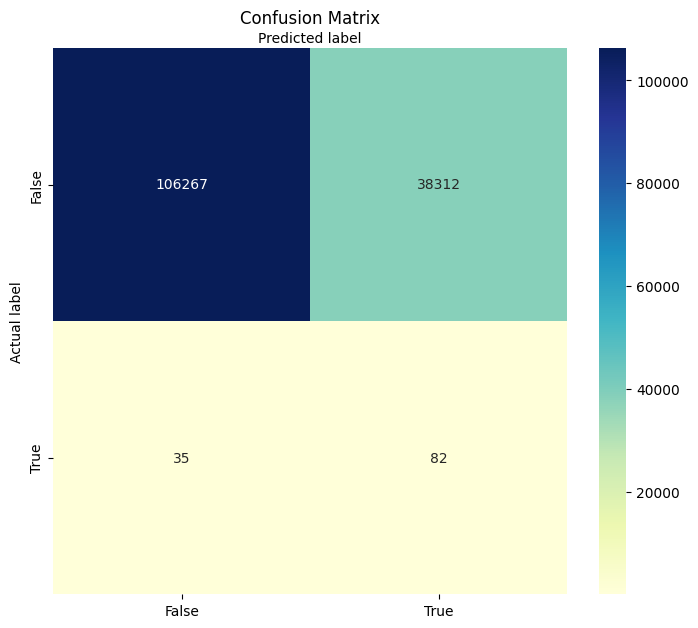

In [25]:
# Display the confusion matrix
class_names = [False, True]
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

### Additional Queries and Data Analysis:

In [26]:
# Query for merchant types and total transaction amounts
merchant_types_query = "SELECT MerchantType, COUNT(1), SUM(TransactionAmount) as TotalAmount FROM transactions GROUP BY MerchantType ORDER BY TotalAmount DESC"
merchant_types_data = pd.read_sql(merchant_types_query, conn)
print(merchant_types_data)

# Query for transactions with missing MerchantType
missing_merchant_type_query = "SELECT MessageTypeIdentifier, * FROM transactions WHERE MerchantType IS NULL"
missing_merchant_type_data = pd.read_sql(missing_merchant_type_query, conn)
print(missing_merchant_type_data)

     MerchantType  COUNT(1)  TotalAmount
0          5411.0     57583   2307963.43
1             NaN       556   1654894.21
2          5812.0     57599   1388714.64
3          5942.0     33478   1250808.40
4          5732.0      2966    700705.69
..            ...       ...          ...
420        3811.0         1        24.12
421        3180.0         1        23.77
422        9405.0         1        20.00
423        5531.0         1        16.00
424        9223.0         1        11.89

[425 rows x 3 columns]
    MessageTypeIdentifier Environment    TranId             TranTime  \
0                     100         CRD  24278398  2021-02-01 13:12:11   
1                     100         CRD  24278399  2021-02-01 13:56:52   
2                     100         CRD  24278400  2021-02-01 14:18:35   
3                     100         CRD  24278401  2021-02-01 15:00:39   
4                     100         CRD  24278402  2021-02-01 18:24:31   
..                    ...         ...       ...     